# Documentación
* https://platform.openai.com/docs/api-reference/chat/create
* https://github.com/openai/
* https://platform.openai.com/docs/api-reference/chat/openai-python

In [1]:
#tenemos la libreria open AI?
try:
    !pip install --upgrade openai
except:
    !pip install openai
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 11.5 MB/s eta 0:00:00


# Crearmos un nuevo API Keys

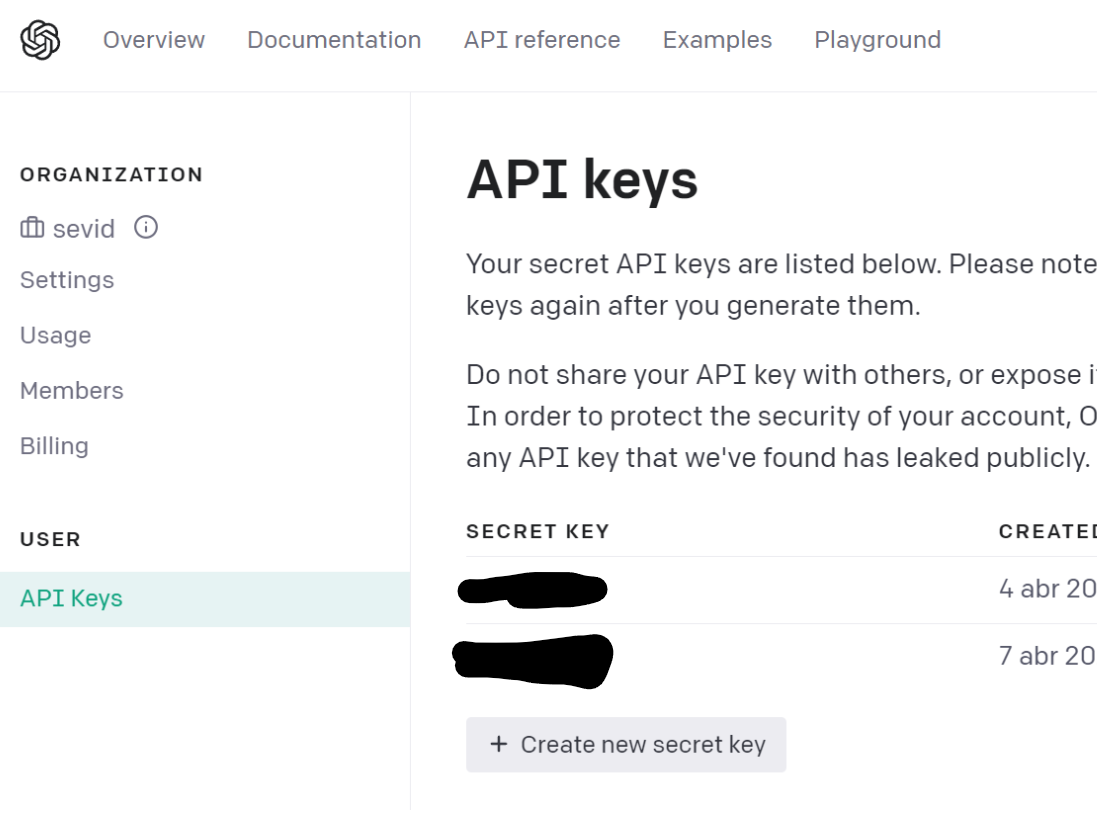

# CODIFICAR

## Monto la unidad de google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Leo archivo con la API KEY de OPENAI

In [4]:
import json
import openai
file_path= "/content/drive/MyDrive/TUTORIALES/GPT/Colab_OpenIA/config.json"
with open(file_path, "r") as f:
    json_text = f.read()
    apod_dict = json.loads(json_text)
    api_key=apod_dict['api_key']

openai.api_key = api_key

## Primer acercamiento

https://platform.openai.com/docs/models:

In [50]:
#model es el modelo a usar, cada uno tiene su costo y nivel de respuesta
#menssage es un array en donde puedo ir dejando pregunta respuesta para enlazar conversacion
#   de esta forma puede llevar contexto
#   role quien esta lanzando el mensaje
response = openai.ChatCompletion.create(model="gpt-3.5-turbo",
                             messages=[{"role":"user", "content":"¿Cuál es la mision de OpenAI?"}])

print(response)
#veremos que el role es assistant
#choices,indica que puede haber mas de una respuesta, en este caso hay una
#usage indica la cantidad de tokens de respuesta + pregunta = total

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "La misi\u00f3n de OpenAI es \"desarrollar inteligencia artificial segura y beneficiosa para todos\". La organizaci\u00f3n trabaja en proyectos y desarrollos de inteligencia artificial que respeten los l\u00edmites \u00e9ticos y sean beneficiosos para la humanidad. Entre sus objetivos se encuentran crear sistemas de inteligencia artificial que puedan entender y resolver problemas complejos, mejorar la educaci\u00f3n, la salud y la vida cotidiana de las personas, y prevenir riesgos y amenazas asociados con el uso irresponsable de la inteligencia artificial.",
        "role": "assistant"
      }
    }
  ],
  "created": 1681242169,
  "id": "chatcmpl-74EB7mciEHBDt8GaZe8RRPyrx96mg",
  "model": "gpt-3.5-turbo-0301",
  "object": "chat.completion",
  "usage": {
    "completion_tokens": 120,
    "prompt_tokens": 19,
    "total_tokens": 139
  }
}


In [51]:
print(response.choices[0].message.content)

La misión de OpenAI es "desarrollar inteligencia artificial segura y beneficiosa para todos". La organización trabaja en proyectos y desarrollos de inteligencia artificial que respeten los límites éticos y sean beneficiosos para la humanidad. Entre sus objetivos se encuentran crear sistemas de inteligencia artificial que puedan entender y resolver problemas complejos, mejorar la educación, la salud y la vida cotidiana de las personas, y prevenir riesgos y amenazas asociados con el uso irresponsable de la inteligencia artificial.


## Segundo acercamiento
Hay un tercer role:
* system: permite establecer el contexto y sesgará todas las respuestas que de
* user: es el usuario
* assistant: es el chat que reponde 

In [56]:
#Crearemos el contexto del asistente
mensajes = [{"role":"user", 
             "content":"Eres un experto en Machine Learning"
            }]

while True:
    contenido = input("Usuario: ")
    if contenido == ":q":
        break
    mensajes.append({"role":"user", "content": contenido})

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=mensajes
        )
    
    response_content = response.choices[0].message.content

    mensajes.append({"role":"assistant", "content": response_content})

    print(response)

Usuario: Hola
{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Como modelo de lenguaje IA, no tengo preferencias, pero hay varios puntos a considerar cuando se trata de Assembler y Python para tareas de Machine Learning. \n\nAssembler es un lenguaje de bajo nivel, mejor utilizado para tareas de programaci\u00f3n de sistemas y control del hardware de la computadora. Su estilo arcano de programaci\u00f3n hace que sea muy eficiente para la ejecuci\u00f3n de tareas que requieren un alto rendimiento en situaciones en las que la velocidad de procesamiento es fundamental. Sin embargo, su comprensi\u00f3n y uso son mucho m\u00e1s complicados, y la programaci\u00f3n requerida para tareas de Machine Learning ser\u00eda extremadamente compleja y propensa a errores.\n\nPython, por otro lado, es un lenguaje de programaci\u00f3n de m\u00e1s alto nivel, y tiene un enfoque m\u00e1s orientado a objetos, lo que lo hace mucho m\u00e1s f\u00e1c

KeyboardInterrupt: ignored

Según los datos al mantener un hilo de la conversación los tokens utilizados aumentarán considerablemente

## Mejora del modelo
https://platform.openai.com/docs/api-reference/chat/create

In [ ]:
https://platform.openai.com/docs/api-reference/chat/create

In [6]:
#Crearemos el contexto del asistente
mensajes = [{"role":"user", 
             "content":"Eres un experto en Machine Learning"
            }]

while True:
    contenido = input("Usuario: ")
    if contenido == ":q":
        break
    mensajes.append({"role":"user", "content": contenido})

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=mensajes
        )
    
    response_content = response.choices[0].message.content

    mensajes.append({"role":"assistant", "content": response_content})

    print(response_content)

Usuario: Hola
Hola, ¿en qué puedo ayudarte en relación al Machine Learning? Soy un asistente virtual con conocimientos en esta área.
Usuario: ¿Cuando debo usar XGBoost y cuando debo usar Redes Neuronales?
XGBoost y las Redes Neuronales son dos algoritmos populares de Machine Learning que tienen sus propias características y ventajas. La elección de uno u otro depende del problema en cuestión y de las características del conjunto de datos. A continuación, te presento algunas consideraciones que pueden ayudarte a tomar una decisión.

XGBoost es un algoritmo de aprendizaje automático basado en árboles de decisión y boostin. Es rápido y escalable, y funciona mejor con datos estructurados y variables numéricas, aunque también puede manejar variables categóricas codificadas. Es particularmente útil para problemas de clasificación y regresión con conjuntos de datos grandes y complejos, y se ha usado ampliamente en aplicaciones de kaggle y otras competiciones de Machine Learning.

Las Redes Ne